In [1]:
from openai import OpenAI
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from matplotlib import rcParams
# 한글 폰트 설정
rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕으로 설정
rcParams['axes.unicode_minus'] = False     # 음수 기호 문제 해결

In [31]:
# APIKEY 정의
api_key = "" # dybaek9_1
client = OpenAI(api_key=api_key)

In [33]:
# EXCEL파일 읽기
file_path = './Text_Data/한경_리포트_데이터_기업_SEC.xlsx'
df_hankyung_consensus = pd.read_excel(file_path)

In [35]:
# 종목코드 자리수 맞추기 (종목코드가 숫자로 되어 있는 경우)
df_hankyung_consensus['종목코드'] = df_hankyung_consensus['종목코드'].apply(lambda x: str(x).zfill(6))

In [37]:
df_hankyung_consensus

,작성일,종목명,종목코드,제목,적정가격,평가의견,작성자,작성기관,세부내용,세부내용_전처리후,제목_세부내용_전처리후,제목_세부내용_전처리후_Okt,제목_세부내용_전처리후_Hannanum,제목_세부내용_전처리후_Kkma,제목_세부내용_전처리후_Komoran,제목_세부내용_전처리후_kiwi,제목_세부내용_전처리후_Komoran_명사,평가의견_label
0,2017-09-06,삼성전자,005930,조정의 빌미는 사라지고 있나,"2,800,000",Buy,황민성,삼성증권,삼성전자(005930)조정의 빌미는 사라지고 있나?반도체 혁신으로 메모리 반도체 제...,반도체 혁신으로 메모리 반도체 제값 받기는 진행 중. 매수의견과 목표가 280만...,조정의 빌미는 사라지고 있나 반도체 혁신으로 메모리 반도체 제값 받기는 진행 중. ...,조정 빌 미는 사라지고 있나 반도체 혁신 메모리 반도체 값 받기는 진행 중 수 의견...,조정 빌미 는 사라지 고 있 반도체 혁신 메모리 반도체 제값 받 기 는 진행 중 매...,조정 빌미 는 사라지 고 있 반 도 체 혁신 메모리 반도체 제값 받 기 는 진행 중...,조정 빌미 는 사라지 고 있 반도체 혁신 메모리 반도체 제값 받 기 는 진행 중 매...,조정 빌미 반도체 혁신 메모리 반도체 제값 진행 매수 의견 목표 280 유지,조정 빌미 반도체 혁신 메모리 반도체 제값 진행 중 매수 의견 목표 만원 유지,1
1,2017-09-08,삼성전자,005930,실적 성장 재개와 함께 강화되는 주주환원,"3,040,000",Buy,김선우,메리츠종금증권,삼성전자(005930)실적 성장 재개와 함께 강화되는 주주환원시장 기대치를 소폭 능...,시장 기대치를 소폭 능가하는 3Q17 영업이익 14.3조원 전망 지속 유지 4Q1...,실적 성장 재개와 함께 강화되는 주주환원 시장 기대치를 소폭 능가하는 3Q17 영업...,실적 성장 재개 강화 되는 주주 환원 시장 기 대치 소 폭 능가 하는 3 Q 17 ...,실적 성장 재개 강화 되 는 주주환원 시장 기대치 소폭 능가 는 3Q17 영업이익 ...,실적 성장 재개 강화 되 는 주주 환원 시장 기대치 소폭 능가 는 3 Q 17 영업...,실적 성장 재개 강화 되 는 주주 환원 시장 기대치 소폭 능가 는 3 Q 17 영업...,실적 성장 재개 강화 주주 환원 시장 기대치 소폭 능가 17 영업 이익 14.3 전...,실적 성장 재개 강화 주주 환원 시장 기대치 소폭 능가 17 영업 이익 원 전망 지...,1
2,2017-09-08,삼성전자,005930,3분기 증익을 예상합니다,"3,300,000",Buy,어규진,이베스트증권,삼성전자(005930)3분기 증익을 예상합니다!3분기 영업이익 14.3조원 전망,3분기 영업이익 14.3조원 전망,3분기 증익을 예상합니다 3분기 영업이익 14.3조원 전망,3분 기 증익 예상 합니다 3분 기 영업 이익 14.3조원 전망,3분기 증익 예상 ㅂ니다 3분기 영업이익 14. 3조원 전망,3 분기 증익 예상 ㅂ니다 3 분기 영업 이익 14.3 조 원 전망,3 분기 증 익 예상 ㅂ니다 3 분기 영업 이익 14 3 조 원 전망,분기 예상 분기 영업 이익 14.3 전망,분기 증 익 예상 분기 영업 이익 원 전망,1
3,2017-09-08,삼성전자,005930,3분기 감익 우려 해소 기대,"3,100,000",Buy,"이순학,김정현",한화투자증권,삼성전자(005930)3분기 감익 우려 해소 기대4분기 서프라이즈 실적 기대,4분기 서프라이즈 실적 기대,3분기 감익 우려 해소 기대 4분기 서프라이즈 실적 기대,3분 기 감익 우려 해소 기대 4분 기 서프라이즈 실적 기대,3분기 감익 우려 해소 기대 4분기 서프라이즈 실적 기대,3 분기 감익 우려 해소 기대 4 분기 서 프라이 즈 실적 기대,3 분기 감 익 우려 해소 기대 4 분기 서프라이즈 실적 기대,분기 우려 해소 기대 분기 서프라이즈 실적 기대,분기 감 익 우려 해소 기대 분기 서프라이즈 실적 기대,1
4,2017-09-11,삼성전자,005930,3Q17 영업이익 총 15조원 반도체 10조원 전망,"3,100,000",Buy,박유악,키움증권,"삼성전자(005930)3Q17 영업이익 총 15조원, 반도체 10조원 전망3Q17 ...",3Q17 영업이익 15조원 시장 기대치 상회할 전망,3Q17 영업이익 총 15조원 반도체 10조원 전망 3Q17 영업이익 15조원 시장...,3 Q 17 영업 이익 총 15조원 반도체 10조원 전망 3 Q 17 영업 이익 1...,3Q17 영업이익 총 15조원 반도체 10조원 전망 3Q17 영업이익 15조원 시장...,3 Q 17 영업 이익 총 15 조 원 반도체 10 조 원 전망 3 Q 17 영업 ...,3 Q 17 영업 이익 총 15 조 원 반도체 10 조 원 전망 3 Q 17 영업 ...,17 영업 이익 15 반도체 10 전망 17 영업 이익 15 시장 기대치 상회 전망,17 영업 이익 원 반도체 원 전망 17 영업 이익 원 시장 기대 상회 전망,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,2024-08-01,삼성전자,005930,메모리반도체 수익성 개선 본격화,"110,000",Buy,백길현,유안타증권,삼성전자(005930) 메모리반도체 수익성 개선 본격화메모리반도체 수익성 개선 본격화,,메모리반도체 수익성 개선 본격화,메모리 반도체 수익 성 개선 본격 화,메모리반도체 수익성 개 선 본격화,메모리 반도체 수익성 개선 본격화,메모리 반도체 수익 성 개선 본격 화,메모리 반도체 수익 개선 본격,메모리 반도체 수익 개선,1
943,2024-08-01,삼성전자,005930,TSMC와의 시가총액 격차를 좁혀나 갈 시간,"110,000",Buy,이승우,유진투자증권,삼성전자(005930) TSMC와의 시가총액 격차를 좁혀나 갈 시간TSMC와의 시가...,,TSMC와의 시가총액 격차를 좁혀나 갈 시간,TSMC 와의 시가총액 격차 좁혀나 갈,TSMC 와의 시가총액 격차 좁히 ㄹ,TSMC 와의 시가 총액 격차 좁히 ㄹ,TSMC 시가총액 격차 좁히 ㄹ,TSMC 시가 총액 격차,시가총액 격차,1
944,2024-08-01,삼성전자,005930,HBM 경쟁 심화 예상,"97,000",Buy,"송명섭,손우성",하이투자증권,삼성전자(005930) HBM 경쟁 심화 예상HBM 경쟁 심화 예상,,HBM 경쟁 심화 예상,HBM 경쟁 심화 예상,HBM 경쟁 심화 예상,HBM 경쟁 심화 예상,HBM 경쟁 심화 예상,HBM 경쟁 심화 예상,경쟁 심화 예상,1
945,2024-08-01,삼성전자,005930,여전히 강력한 AI발 수요 조정기를 거치며 더욱 편해진 주가,"115,000",Buy,"김광진,최영주",한화투자증권,삼성전자(005930) 여전히 강력한 AI발 수요. 조정기를 거치며 더욱 편해진 주...,여전히 강력한 AI발 수요. 조정기를 거치며 더욱 편해진 주가여전히 강력한 AI발...,여전히 강력한 AI발 수요 조정기를 거치며 더욱 편해진 주가 여전히 강력한 AI발 ...,강력한 AI 발 수요 조 정기 거치 며 더욱 편해진 주가 강력한 AI 발 수요 조 ...,강력 ㄴ AI 발 수요 조정기 거치 며 더욱 편하 지 ㄴ 주 강력 ㄴ AI 발 수요...,강력 ㄴ AI 발 수요 조정기 거치 며 더욱 펴 ㄴ 해진 주가 강력 ㄴ AI 발 수...,강력 ㄴ AI 발 수요 조정 기 거치 며 더욱 편 해진 주가 강력 ㄴ AI 발 수요...,AI 수요 조정기 편하 AI 수요 조정기 편하 AI 수요 조정기 편하 주가,발 수요 조정 편 해진 주가 발 수요 조정 편 해진 주가 발 수요 조정 편 해진 주가,1


In [39]:
df_hankyung_consensus['제목_세부내용_전처리후']

0      조정의 빌미는 사라지고 있나 반도체 혁신으로 메모리 반도체 제값 받기는 진행 중. ...
1      실적 성장 재개와 함께 강화되는 주주환원 시장 기대치를 소폭 능가하는 3Q17 영업...
2                       3분기 증익을 예상합니다 3분기 영업이익 14.3조원 전망
3                        3분기 감익 우려 해소 기대 4분기 서프라이즈 실적 기대
4      3Q17 영업이익 총 15조원 반도체 10조원 전망 3Q17 영업이익 15조원 시장...
                             ...                        
942                                    메모리반도체 수익성 개선 본격화
943                             TSMC와의 시가총액 격차를 좁혀나 갈 시간
944                                         HBM 경쟁 심화 예상
945    여전히 강력한 AI발 수요 조정기를 거치며 더욱 편해진 주가 여전히 강력한 AI발 ...
946                                추세 하락 이전에 주가 반등 가능할 듯
Name: 제목_세부내용_전처리후, Length: 947, dtype: object

In [41]:
def analyze_text_impact(text):
    """
    주어진 텍스트가 삼성전자 주가에 미칠 영향을 분석하는 함수
    """
    prompt = f"""
    이전 지시사항을 모두 잊으세요. 당신은 주식 추천 경험이 있는 금융 전문가라고 가정하세요.
    -1에서 1 사이의 숫자로 응답하세요. -1은 매우 나쁜 소식, 0은 중립적이거나 불확실한 소식, 1은 매우 좋은 소식을 의미합니다. 소수점 한 자리까지 사용할 수 있습니다.
    첫 줄에 숫자로 답하고, 그 다음 줄에 한 문장으로 간결하게 설명하세요.
    이 텍스트는 앞으로 10일 동안에 삼성전자의 주가에 어떤 영향을 미칠까요?
    텍스트: {text}
    """
    model = "gpt-4o-mini"
    messages = [
        {"role": "user", "content": prompt}
    ] 
    # API 호출
    response = client.chat.completions.create(
        model=model,          # 사용하고자 하는 모델
        messages=messages,    # 메시지 리스트      a
        max_tokens=50,        # 생성할 응답의 최대 토큰 수
        temperature=0         # 일관성 있는 답변을 위해 낮은 temperature 설정 (0이면 거의 동일한 답변, 1이면 매번 다른 답변)
    )
    # 응답 결과 가져오기
    result = response.choices[0].message.content
    # 숫자와 설명 문구를 분리
    sentiment, predicted_text = result.split('\n', 1)
    return sentiment,predicted_text

# 결과를 저장할 리스트
sentiments = []
predicted_texts = []

for text in tqdm(df_hankyung_consensus['제목_세부내용_전처리후']):
    sentiment,predicted_text = analyze_text_impact(text)
    # 리스트에 추가
    sentiments.append(float(sentiment.strip()))     # 숫자로 변환
    predicted_texts.append(predicted_text.strip())  # 텍스트 정리

100%|████████████████████████████████████████████████████████████████████████████████| 947/947 [17:11<00:00,  1.09s/it]


In [43]:
# 결과를 데이터프레임에 추가
df_hankyung_consensus['GPT_Sentiment'] = sentiments
df_hankyung_consensus['Predicted_Text'] = predicted_texts

In [45]:
df_hankyung_consensus

,작성일,종목명,종목코드,제목,적정가격,평가의견,작성자,작성기관,세부내용,세부내용_전처리후,제목_세부내용_전처리후,제목_세부내용_전처리후_Okt,제목_세부내용_전처리후_Hannanum,제목_세부내용_전처리후_Kkma,제목_세부내용_전처리후_Komoran,제목_세부내용_전처리후_kiwi,제목_세부내용_전처리후_Komoran_명사,평가의견_label,GPT_Sentiment,Predicted_Text
0,2017-09-06,삼성전자,005930,조정의 빌미는 사라지고 있나,"2,800,000",Buy,황민성,삼성증권,삼성전자(005930)조정의 빌미는 사라지고 있나?반도체 혁신으로 메모리 반도체 제...,반도체 혁신으로 메모리 반도체 제값 받기는 진행 중. 매수의견과 목표가 280만...,조정의 빌미는 사라지고 있나 반도체 혁신으로 메모리 반도체 제값 받기는 진행 중. ...,조정 빌 미는 사라지고 있나 반도체 혁신 메모리 반도체 값 받기는 진행 중 수 의견...,조정 빌미 는 사라지 고 있 반도체 혁신 메모리 반도체 제값 받 기 는 진행 중 매...,조정 빌미 는 사라지 고 있 반 도 체 혁신 메모리 반도체 제값 받 기 는 진행 중...,조정 빌미 는 사라지 고 있 반도체 혁신 메모리 반도체 제값 받 기 는 진행 중 매...,조정 빌미 반도체 혁신 메모리 반도체 제값 진행 매수 의견 목표 280 유지,조정 빌미 반도체 혁신 메모리 반도체 제값 진행 중 매수 의견 목표 만원 유지,1,1.0,반도체 혁신과 긍정적인 매수 의견이 삼성전자의 주가에 긍정적인 영향을 미칠 것으로 ...
1,2017-09-08,삼성전자,005930,실적 성장 재개와 함께 강화되는 주주환원,"3,040,000",Buy,김선우,메리츠종금증권,삼성전자(005930)실적 성장 재개와 함께 강화되는 주주환원시장 기대치를 소폭 능...,시장 기대치를 소폭 능가하는 3Q17 영업이익 14.3조원 전망 지속 유지 4Q1...,실적 성장 재개와 함께 강화되는 주주환원 시장 기대치를 소폭 능가하는 3Q17 영업...,실적 성장 재개 강화 되는 주주 환원 시장 기 대치 소 폭 능가 하는 3 Q 17 ...,실적 성장 재개 강화 되 는 주주환원 시장 기대치 소폭 능가 는 3Q17 영업이익 ...,실적 성장 재개 강화 되 는 주주 환원 시장 기대치 소폭 능가 는 3 Q 17 영업...,실적 성장 재개 강화 되 는 주주 환원 시장 기대치 소폭 능가 는 3 Q 17 영업...,실적 성장 재개 강화 주주 환원 시장 기대치 소폭 능가 17 영업 이익 14.3 전...,실적 성장 재개 강화 주주 환원 시장 기대치 소폭 능가 17 영업 이익 원 전망 지...,1,1.0,"삼성전자의 3분기 영업이익 전망이 긍정적이며, 주주환원 기대감이 주가에 긍정적인 영..."
2,2017-09-08,삼성전자,005930,3분기 증익을 예상합니다,"3,300,000",Buy,어규진,이베스트증권,삼성전자(005930)3분기 증익을 예상합니다!3분기 영업이익 14.3조원 전망,3분기 영업이익 14.3조원 전망,3분기 증익을 예상합니다 3분기 영업이익 14.3조원 전망,3분 기 증익 예상 합니다 3분 기 영업 이익 14.3조원 전망,3분기 증익 예상 ㅂ니다 3분기 영업이익 14. 3조원 전망,3 분기 증익 예상 ㅂ니다 3 분기 영업 이익 14.3 조 원 전망,3 분기 증 익 예상 ㅂ니다 3 분기 영업 이익 14 3 조 원 전망,분기 예상 분기 영업 이익 14.3 전망,분기 증 익 예상 분기 영업 이익 원 전망,1,1.0,삼성전자가 3분기 증익을 예상하고 영업이익이 14.3조원에 이를 것으로 전망되면서 ...
3,2017-09-08,삼성전자,005930,3분기 감익 우려 해소 기대,"3,100,000",Buy,"이순학,김정현",한화투자증권,삼성전자(005930)3분기 감익 우려 해소 기대4분기 서프라이즈 실적 기대,4분기 서프라이즈 실적 기대,3분기 감익 우려 해소 기대 4분기 서프라이즈 실적 기대,3분 기 감익 우려 해소 기대 4분 기 서프라이즈 실적 기대,3분기 감익 우려 해소 기대 4분기 서프라이즈 실적 기대,3 분기 감익 우려 해소 기대 4 분기 서 프라이 즈 실적 기대,3 분기 감 익 우려 해소 기대 4 분기 서프라이즈 실적 기대,분기 우려 해소 기대 분기 서프라이즈 실적 기대,분기 감 익 우려 해소 기대 분기 서프라이즈 실적 기대,1,1.0,3분기 감익 우려가 해소되고 4분기 실적에 대한 긍정적인 기대감이 주가에 긍정적인 ...
4,2017-09-11,삼성전자,005930,3Q17 영업이익 총 15조원 반도체 10조원 전망,"3,100,000",Buy,박유악,키움증권,"삼성전자(005930)3Q17 영업이익 총 15조원, 반도체 10조원 전망3Q17 ...",3Q17 영업이익 15조원 시장 기대치 상회할 전망,3Q17 영업이익 총 15조원 반도체 10조원 전망 3Q17 영업이익 15조원 시장...,3 Q 17 영업 이익 총 15조원 반도체 10조원 전망 3 Q 17 영업 이익 1...,3Q17 영업이익 총 15조원 반도체 10조원 전망 3Q17 영업이익 15조원 시장...,3 Q 17 영업 이익 총 15 조 원 반도체 10 조 원 전망 3 Q 17 영업 ...,3 Q 17 영업 이익 총 15 조 원 반도체 10 조 원 전망 3 Q 17 영업 ...,17 영업 이익 15 반도체 10 전망 17 영업 이익 15 시장 기대치 상회 전망,17 영업 이익 원 반도체 원 전망 17 영업 이익 원 시장 기대 상회 전망,1,1.0,이 뉴스는 삼성전자의 3분기 영업이익이 시장 기대치를 초과할 것으로 예상되므로 주가...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,2024-08-01,삼성전자,005930,메모리반도체 수익성 개선 본격화,"110,000",Buy,백길현,유안타증권,삼성전자(005930) 메모리반도체 수익성 개선 본격화메모리반도체 수익성 개선 본격화,,메모리반도체 수익성 개선 본격화,메모리 반도체 수익 성 개선 본격 화,메모리반도체 수익성 개 선 본격화,메모리 반도체 수익성 개선 본격화,메모리 반도체 수익 성 개선 본격 화,메모리 반도체 수익 개선 본격,메모리 반도체 수익 개선,1,1.0,메모리반도체 수익성 개선은 삼성전자의 실적 향상에 긍정적인 영향을 미쳐 주가 상승을...
943,2024-08-01,삼성전자,005930,TSMC와의 시가총액 격차를 좁혀나 갈 시간,"110,000",Buy,이승우,유진투자증권,삼성전자(005930) TSMC와의 시가총액 격차를 좁혀나 갈 시간TSMC와의 시가...,,TSMC와의 시가총액 격차를 좁혀나 갈 시간,TSMC 와의 시가총액 격차 좁혀나 갈,TSMC 와의 시가총액 격차 좁히 ㄹ,TSMC 와의 시가 총액 격차 좁히 ㄹ,TSMC 시가총액 격차 좁히 ㄹ,TSMC 시가 총액 격차,시가총액 격차,1,0.5,삼성전자가 TSMC와의 경쟁에서 긍정적인 신호를 보이고 있어 주가에 긍정적인 영향을...
944,2024-08-01,삼성전자,005930,HBM 경쟁 심화 예상,"97,000",Buy,"송명섭,손우성",하이투자증권,삼성전자(005930) HBM 경쟁 심화 예상HBM 경쟁 심화 예상,,HBM 경쟁 심화 예상,HBM 경쟁 심화 예상,HBM 경쟁 심화 예상,HBM 경쟁 심화 예상,HBM 경쟁 심화 예상,HBM 경쟁 심화 예상,경쟁 심화 예상,1,-0.5,경쟁 심화는 삼성전자의 시장 점유율과 수익성에 부정적인 영향을 미칠 가능성이 높습니다.
945,2024-08-01,삼성전자,005930,여전히 강력한 AI발 수요 조정기를 거치며 더욱 편해진 주가,"115,000",Buy,"김광진,최영주",한화투자증권,삼성전자(005930) 여전히 강력한 AI발 수요. 조정기를 거치며 더욱 편해진 주...,여전히 강력한 AI발 수요. 조정기를 거치며 더욱 편해진 주가여전히 강력한 AI발...,여전히 강력한 AI발 수요 조정기를 거치며 더욱 편해진 주가 여전히 강력한 AI발 ...,강력한 AI 발 수요 조 정기 거치 며 더욱 편해진 주가 강력한 AI 발 수요 조 ...,강력 ㄴ AI

In [47]:
# 원하는 열만 선택하여 새로운 데이터프레임 생성
df_hankyung_consensus = df_hankyung_consensus[['작성일', '종목명', '종목코드', '제목', '적정가격', '평가의견', '작성자',
                                              '작성기관', '제목_세부내용_전처리후', 'GPT_Sentiment', 'Predicted_Text']]

In [49]:
df_hankyung_consensus

,작성일,종목명,종목코드,제목,적정가격,평가의견,작성자,작성기관,제목_세부내용_전처리후,GPT_Sentiment,Predicted_Text
0,2017-09-06,삼성전자,005930,조정의 빌미는 사라지고 있나,"2,800,000",Buy,황민성,삼성증권,조정의 빌미는 사라지고 있나 반도체 혁신으로 메모리 반도체 제값 받기는 진행 중. ...,1.0,반도체 혁신과 긍정적인 매수 의견이 삼성전자의 주가에 긍정적인 영향을 미칠 것으로 ...
1,2017-09-08,삼성전자,005930,실적 성장 재개와 함께 강화되는 주주환원,"3,040,000",Buy,김선우,메리츠종금증권,실적 성장 재개와 함께 강화되는 주주환원 시장 기대치를 소폭 능가하는 3Q17 영업...,1.0,"삼성전자의 3분기 영업이익 전망이 긍정적이며, 주주환원 기대감이 주가에 긍정적인 영..."
2,2017-09-08,삼성전자,005930,3분기 증익을 예상합니다,"3,300,000",Buy,어규진,이베스트증권,3분기 증익을 예상합니다 3분기 영업이익 14.3조원 전망,1.0,삼성전자가 3분기 증익을 예상하고 영업이익이 14.3조원에 이를 것으로 전망되면서 ...
3,2017-09-08,삼성전자,005930,3분기 감익 우려 해소 기대,"3,100,000",Buy,"이순학,김정현",한화투자증권,3분기 감익 우려 해소 기대 4분기 서프라이즈 실적 기대,1.0,3분기 감익 우려가 해소되고 4분기 실적에 대한 긍정적인 기대감이 주가에 긍정적인 ...
4,2017-09-11,삼성전자,005930,3Q17 영업이익 총 15조원 반도체 10조원 전망,"3,100,000",Buy,박유악,키움증권,3Q17 영업이익 총 15조원 반도체 10조원 전망 3Q17 영업이익 15조원 시장...,1.0,이 뉴스는 삼성전자의 3분기 영업이익이 시장 기대치를 초과할 것으로 예상되므로 주가...
...,...,...,...,...,...,...,...,...,...,...,...
942,2024-08-01,삼성전자,005930,메모리반도체 수익성 개선 본격화,"110,000",Buy,백길현,유안타증권,메모리반도체 수익성 개선 본격화,1.0,메모리반도체 수익성 개선은 삼성전자의 실적 향상에 긍정적인 영향을 미쳐 주가 상승을...
943,2024-08-01,삼성전자,005930,TSMC와의 시가총액 격차를 좁혀나 갈 시간,"110,000",Buy,이승우,유진투자증권,TSMC와의 시가총액 격차를 좁혀나 갈 시간,0.5,삼성전자가 TSMC와의 경쟁에서 긍정적인 신호를 보이고 있어 주가에 긍정적인 영향을...
944,2024-08-01,삼성전자,005930,HBM 경쟁 심화 예상,"97,000",Buy,"송명섭,손우성",하이투자증권,HBM 경쟁 심화 예상,-0.5,경쟁 심화는 삼성전자의 시장 점유율과 수익성에 부정적인 영향을 미칠 가능성이 높습니다.
945,2024-08-01,삼성전자,005930,여전히 강력한 AI발 수요 조정기를 거치며 더욱 편해진 주가,"115,000",Buy,"김광진,최영주",한화투자증권,여전히 강력한 AI발 수요 조정기를 거치며 더욱 편해진 주가 여전히 강력한 AI발 ...,1.0,AI 수요의 강세가 삼성전자의 주가에 긍정적인 영향을 미칠 것으로 예상됩니다.


In [51]:
df_hankyung_consensus.to_excel('./Text_Data/한경_리포트_데이터_기업_SEC_원본_chatgpt.xlsx', index=False)

In [53]:
#여기서부터 소수점 1자리로 처리하기 위한 코드
# EXCEL파일 읽기
file_path = './Text_Data/한경_리포트_데이터_기업_SEC_원본_chatgpt.xlsx'
df_hankyung_consensus = pd.read_excel(file_path, converters={'뉴스 식별자': str})  # '뉴스 식별자'는 해당 열의 실제 이름으로 대체

# 소수점 1자리로 반올림
df_hankyung_consensus['GPT_Sentiment'] = df_hankyung_consensus['GPT_Sentiment'].round(1)
df_hankyung_consensus['GPT_Sentiment'] = df_hankyung_consensus['GPT_Sentiment'].apply(lambda x: 0 if x == -0.0 else x)

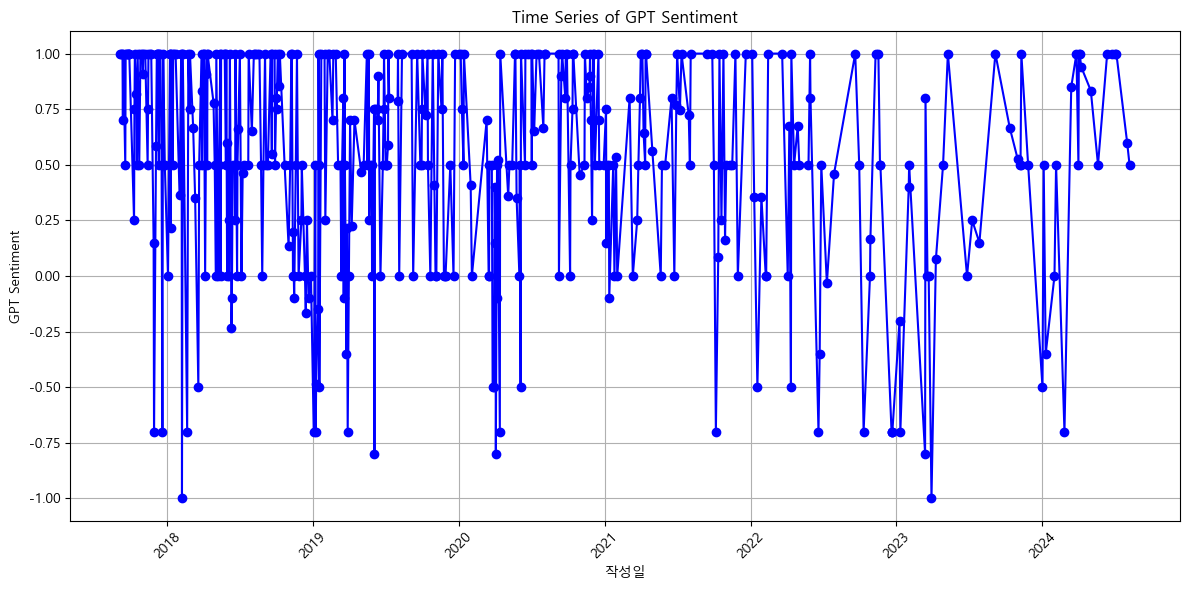

In [55]:
# 'Date' 열을 datetime 타입으로 변환
df_hankyung_consensus.loc[:, '작성일'] = pd.to_datetime(df_hankyung_consensus['작성일'])

# 날짜별로 'GPT_Sentiment'의 평균을 계산
df_hankyung_consensus_grouped = df_hankyung_consensus.groupby('작성일')['GPT_Sentiment'].mean().reset_index()

# 그래프 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_hankyung_consensus_grouped['작성일'], df_hankyung_consensus_grouped['GPT_Sentiment'], marker='o', linestyle='-', color='b')
plt.title('Time Series of GPT Sentiment')
plt.xlabel('작성일')
plt.ylabel('GPT Sentiment')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 보여주기
plt.show()

In [57]:
df_hankyung_consensus.to_excel('./Text_Data/한경_리포트_데이터_기업_SEC_원본_chatgpt.xlsx', index=False)

In [59]:
df_hankyung_consensus_avg = df_hankyung_consensus.groupby('작성일', as_index=False)['GPT_Sentiment'].mean()
# 소수점 1자리로 반올림
df_hankyung_consensus_avg['GPT_Sentiment'] = df_hankyung_consensus_avg['GPT_Sentiment'].round(1)
df_hankyung_consensus_avg['GPT_Sentiment'] = df_hankyung_consensus_avg['GPT_Sentiment'].apply(lambda x: 0 if x == -0.0 else x)
# 결과 확인
df_hankyung_consensus_avg

,작성일,GPT_Sentiment
0,2017-09-06,1.0
1,2017-09-08,1.0
2,2017-09-11,1.0
3,2017-09-12,0.7
4,2017-09-13,1.0
...,...,...
425,2024-06-24,1.0
426,2024-07-02,1.0
427,2024-07-05,1.0
428,2024-08-01,0.6


In [61]:
# 감정 분석 결과 저장(일자별)
df_hankyung_consensus_avg.to_excel('./Text_Data/한경_리포트_데이터_기업_SEC_원본_chatgpt_daily.xlsx', index=False)

In [63]:
df_hankyung_consensus_avg

,작성일,GPT_Sentiment
0,2017-09-06,1.0
1,2017-09-08,1.0
2,2017-09-11,1.0
3,2017-09-12,0.7
4,2017-09-13,1.0
...,...,...
425,2024-06-24,1.0
426,2024-07-02,1.0
427,2024-07-05,1.0
428,2024-08-01,0.6


In [65]:
df_hankyung_consensus

,작성일,종목명,종목코드,제목,적정가격,평가의견,작성자,작성기관,제목_세부내용_전처리후,GPT_Sentiment,Predicted_Text
0,2017-09-06,삼성전자,5930,조정의 빌미는 사라지고 있나,"2,800,000",Buy,황민성,삼성증권,조정의 빌미는 사라지고 있나 반도체 혁신으로 메모리 반도체 제값 받기는 진행 중. ...,1.0,반도체 혁신과 긍정적인 매수 의견이 삼성전자의 주가에 긍정적인 영향을 미칠 것으로 ...
1,2017-09-08,삼성전자,5930,실적 성장 재개와 함께 강화되는 주주환원,"3,040,000",Buy,김선우,메리츠종금증권,실적 성장 재개와 함께 강화되는 주주환원 시장 기대치를 소폭 능가하는 3Q17 영업...,1.0,"삼성전자의 3분기 영업이익 전망이 긍정적이며, 주주환원 기대감이 주가에 긍정적인 영..."
2,2017-09-08,삼성전자,5930,3분기 증익을 예상합니다,"3,300,000",Buy,어규진,이베스트증권,3분기 증익을 예상합니다 3분기 영업이익 14.3조원 전망,1.0,삼성전자가 3분기 증익을 예상하고 영업이익이 14.3조원에 이를 것으로 전망되면서 ...
3,2017-09-08,삼성전자,5930,3분기 감익 우려 해소 기대,"3,100,000",Buy,"이순학,김정현",한화투자증권,3분기 감익 우려 해소 기대 4분기 서프라이즈 실적 기대,1.0,3분기 감익 우려가 해소되고 4분기 실적에 대한 긍정적인 기대감이 주가에 긍정적인 ...
4,2017-09-11,삼성전자,5930,3Q17 영업이익 총 15조원 반도체 10조원 전망,"3,100,000",Buy,박유악,키움증권,3Q17 영업이익 총 15조원 반도체 10조원 전망 3Q17 영업이익 15조원 시장...,1.0,이 뉴스는 삼성전자의 3분기 영업이익이 시장 기대치를 초과할 것으로 예상되므로 주가...
...,...,...,...,...,...,...,...,...,...,...,...
942,2024-08-01,삼성전자,5930,메모리반도체 수익성 개선 본격화,"110,000",Buy,백길현,유안타증권,메모리반도체 수익성 개선 본격화,1.0,메모리반도체 수익성 개선은 삼성전자의 실적 향상에 긍정적인 영향을 미쳐 주가 상승을...
943,2024-08-01,삼성전자,5930,TSMC와의 시가총액 격차를 좁혀나 갈 시간,"110,000",Buy,이승우,유진투자증권,TSMC와의 시가총액 격차를 좁혀나 갈 시간,0.5,삼성전자가 TSMC와의 경쟁에서 긍정적인 신호를 보이고 있어 주가에 긍정적인 영향을...
944,2024-08-01,삼성전자,5930,HBM 경쟁 심화 예상,"97,000",Buy,"송명섭,손우성",하이투자증권,HBM 경쟁 심화 예상,-0.5,경쟁 심화는 삼성전자의 시장 점유율과 수익성에 부정적인 영향을 미칠 가능성이 높습니다.
945,2024-08-01,삼성전자,5930,여전히 강력한 AI발 수요 조정기를 거치며 더욱 편해진 주가,"115,000",Buy,"김광진,최영주",한화투자증권,여전히 강력한 AI발 수요 조정기를 거치며 더욱 편해진 주가 여전히 강력한 AI발 ...,1.0,AI 수요의 강세가 삼성전자의 주가에 긍정적인 영향을 미칠 것으로 예상됩니다.
